# Liu Xingyu - DAV 6150 - Module 11 assignment

## Introduction

In this report, I will analyze on a data set consisting of 22 characteristics of mushrooms to compare the performance of single decision tree and the performance of the random forest. This information could be used to learn the advantages and disadvantages of single decision tree and random forest. The target value in this report is "veil-color", and all the other varibales are exploratory variables which are different aspects of characteristics of mushrooms.

To accomplish this, I will first perform an exploratory data analysis ("EDA") on each of the variables in an effort to discover any data integrity issues (i.e. missing or invalid values), uncover any outliers, and see the distribution of the data. 

Then, based on the results of my EDA, I will perform the necessary data preparation and cleaning in order to prepare the data for use in a machine learning model. This work will be guided by my domain knowledge and EDA, and will be explained further in that section. I will again perform an EDA on my transformed data, in order to see the effects of my transformations on the data. I will compare the results of our transformed data to those of the original data and discuss how my transformations will lead to a better machine learning model.

After the data preparation I will perform feature selection and/or dimensionality reduction.

Then I will split the data into training and testing subsets, use the training subset to construct at least
two different decision tree models and two different random forest models using different
combinations of the explanatory variables.

Lastly, I will choose the best classification model from those I constructed using some metrics, fit this model with the testing data to see how my model performs. 

In [9]:
## Pictures of different mushrooms
from IPython.display import Image
img = 'mushroom.jpeg'
Image(url=img)

## Data Profiling & Domain Knowledge Development

### Before importing the dataset to Jupyter notebook, I have labeled the columns in the following sequence:

**PE** - This is a classification column to show whether the mushroom is poisonous or edible, p = poisonous, e = edible.

**cap shape** - bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

In [14]:
## Pictures of different cap shapes of mushrooms
from IPython.display import Image
img = 'capshape.jpeg'
Image(url=img)

**cap surface** - fibrous=f,grooves=g,scaly=y,smooth=s

In [15]:
## Pictures of different cap surfaces of mushrooms
from IPython.display import Image
img = 'capsurface.jpg'
Image(url=img)

**cap color** - brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y

**bruises** -  bruises=t,no=f

**odor** - almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s

**gill attachment** - attached=a,descending=d,free=f,notched=n

In [17]:
## Pictures of different gill attachments of mushrooms
## Adanate, Adbexed are attached
## Decurrent is Descending 
## Sinuate is notched
from IPython.display import Image
img = 'gillattachment.gif'
Image(url=img)

**gill spacing** - close=c,crowded=w,distant=d

In [22]:
## Pictures of different gill spacing of mushrooms
from IPython.display import Image
img = 'gillspacing.jpg'
Image(url=img)

**gill size** - broad=b,narrow=n

In [24]:
## Pictures of different gill sizes of mushrooms
from IPython.display import Image
img = 'gillsize.jpg'
Image(url=img)

**gill color** - black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y

**stalk shape** - enlarging=e,tapering=t

In [25]:
## Pictures of different stalk shapes of mushrooms
from IPython.display import Image
img = 'stalkshapes.jpg'
Image(url=img)

**stalk root** - bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?

In [26]:
## Pictures of different stalk roots of mushrooms
from IPython.display import Image
img = 'stalkrootshapes.jpg'
Image(url=img)

**stalk surface above ring** - fibrous=f,scaly=y,silky=k,smooth=s

**stalk surface below ring** - fibrous=f,scaly=y,silky=k,smooth=s

In [28]:
## Pictures of different stalk surfaces of mushrooms
from IPython.display import Image
img = 'stalksurface.jpg'
Image(url=img)

**stalk color above ring** -  brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

**stalk color below ring** -  brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

**veil type** - partial=p,universal=u. 

A partial veil (also called an inner veil, to differentiate it from the "outer" veil, or velum) is a temporary structure of tissue found on the fruiting bodies of some basidiomycete fungi, typically agarics. Its role is to isolate and protect the developing spore-producing surface, represented by gills or tubes, found on the lower surface of the cap. A partial veil, in contrast to a universal veil, extends from the stem surface to the cap edge. The partial veil later disintegrates, once the fruiting body has matured and the spores are ready for dispersal. It might then give rise to a stem ring, or fragments attached to the stem or cap edge. According to [this link](https://en.wikipedia.org/wiki/Partial_veil). A universal veil is a temporary membranous tissue that fully envelops immature fruiting bodies of certain gilled mushrooms. According to [this link](https://en.wikipedia.org/wiki/Universal_veil).

**veil color** - brown=n,orange=o,white=w,yellow=y

**ring number** - none=n,one=o,two=t

**ring type** - cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z

In [32]:
## Pictures of different ring types of mushrooms
from IPython.display import Image
img = 'ringtypes.jpg'
Image(url=img)

**spore print color** - black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y

**population** -abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 

**habitat** - grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [30]:
## Pictures of different parts of mushrooms
from IPython.display import Image
img = 'mushh.png'
Image(url=img)

## Exploratory Data Analysis

First I will read the data into python using pandas read xls function. Then I will look for missing and/or invalid data values and perform an exploratory data analysis on my dataset to determine what data need to be prepared for a future machine learning model. 

In [594]:
#import the file and important packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm

import pandas as pd
mushroom = pd.read_excel("M11_Data.xls")

In [595]:
#check results
mushroom.head()

,PE,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [596]:
# check the dataset for null values
mushroom.isnull().sum()

PE                       0
capshape                 0
capsurface               0
capcolor                 0
bruises                  0
odor                     0
gillattachment           0
gillspacing              0
gillsize                 0
gillcolor                0
stalkshape               0
stalkroot                0
stalksurfaceabovering    0
stalksurfacebelowring    0
stalkcolorabovering      0
stalkcolorbelowring      0
veiltype                 0
veilcolor                0
ringnumber               0
ringtype                 0
sporeprintcolor          0
population               0
habitat                  0
dtype: int64

There are no missing values in the dataset.

In [597]:
#get summary statistics for each variable, including mean, standard deviation, median, quartiles, and range
mushroom.describe()

,PE,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


I see from above that most mushrooms in the dataset are edible, convex cap, scaly cap, cinnamon cap, without bruises, with no odor, free gill attachment, close gill spacing, broad gill size, buff gill color, the stalk surface below ring is smooth, the stalk color above ring is white, the stalk color below ring is white, partial veil type, white veil color, with one ring, with pendant ring type, spore print color is white, with several population, living in woods. Something similar like that with background to woods:

In [598]:
## Pictures of most mushrooms
from IPython.display import Image
img = 'images.jpeg'
Image(url=img)

Now I will investigate further to see if there are missing values which appear in form of strings, to do this, I will check the types of the data:

In [599]:
#check the types of data 
mushroom.dtypes

PE                       object
capshape                 object
capsurface               object
capcolor                 object
bruises                  object
odor                     object
gillattachment           object
gillspacing              object
gillsize                 object
gillcolor                object
stalkshape               object
stalkroot                object
stalksurfaceabovering    object
stalksurfacebelowring    object
stalkcolorabovering      object
stalkcolorbelowring      object
veiltype                 object
veilcolor                object
ringnumber               object
ringtype                 object
sporeprintcolor          object
population               object
habitat                  object
dtype: object

All the data are types of objects, then I will check whether there is "?" or "na" in dataset:

In [600]:
#Check whether there are mistakes and omissions on categorical variables.
classes = ['PE','capshape','capsurface','capcolor','bruises','odor',
           'gillattachment','gillspacing','gillsize','gillcolor',
          'stalkshape','stalkroot','stalksurfaceabovering','stalksurfacebelowring',
          'stalkcolorabovering','stalkcolorbelowring','veiltype','veilcolor','ringnumber','ringtype',
          'sporeprintcolor','population','habitat']

for each in classes:
    print(each + ':\n')
    print(list(mushroom[each].drop_duplicates()))
    print('\n')

PE:

['p', 'e']


capshape:

['x', 'b', 's', 'f', 'k', 'c']


capsurface:

['s', 'y', 'f', 'g']


capcolor:

['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r']


bruises:

['t', 'f']


odor:

['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']


gillattachment:

['f', 'a']


gillspacing:

['c', 'w']


gillsize:

['n', 'b']


gillcolor:

['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o']


stalkshape:

['e', 't']


stalkroot:

['e', 'c', 'b', 'r', '?']


stalksurfaceabovering:

['s', 'f', 'k', 'y']


stalksurfacebelowring:

['s', 'f', 'y', 'k']


stalkcolorabovering:

['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y']


stalkcolorbelowring:

['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c']


veiltype:

['p']


veilcolor:

['w', 'n', 'o', 'y']


ringnumber:

['o', 't', 'n']


ringtype:

['p', 'e', 'l', 'f', 'n']


sporeprintcolor:

['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b']


population:

['s', 'n', 'a', 'v', 'y', 'c']


habitat:

['u', 'g', 'm', 'd', 'p', 'w', 'l']




From above, I found the columns do not have unusual symbols except the column 'stalkroot' has "?".

Also, veil type has only one value, I will drop this variable from analysis because it does not provide any information.

In [601]:
## Drop the column veil type from the dataset
mushroom = mushroom.drop('veiltype', axis=1)

Next I will look at the distributions of our data to identify the shape of the distribution。

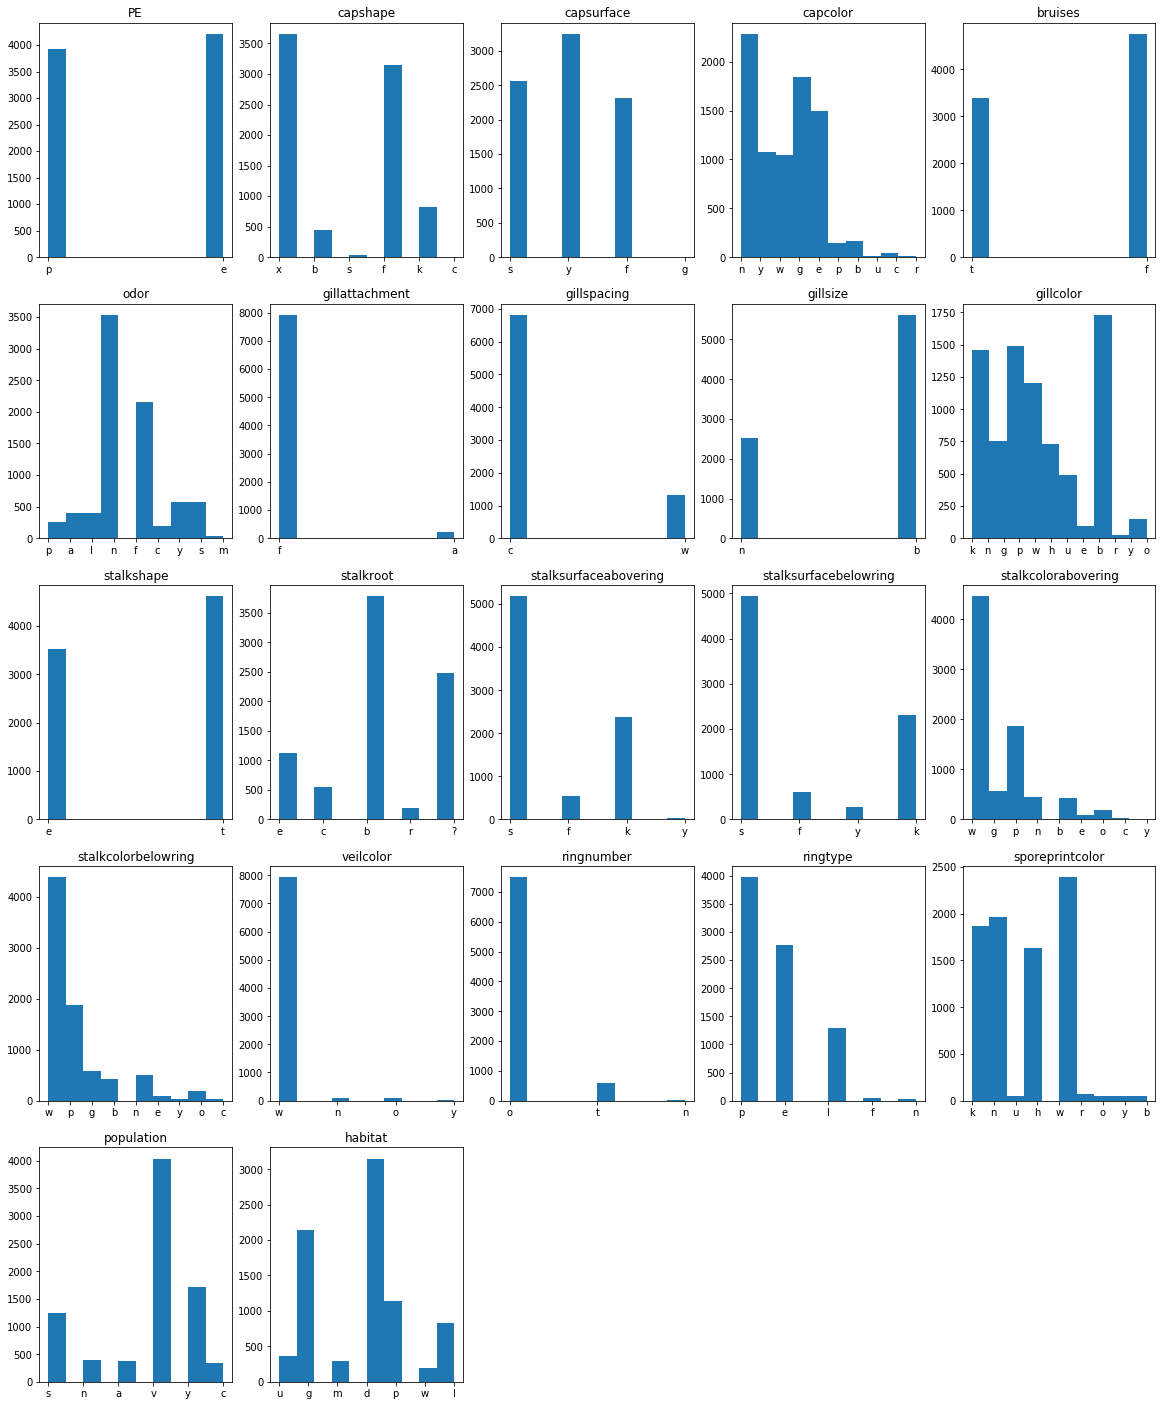

In [602]:
#define a figure to which we will add a histogram for each of our attributes
plt.figure(figsize=(20,25))

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1
columns=mushroom.columns.tolist()
for k in columns[0:] :    
    plt.subplot(5,5,j) 
    plt.hist(mushroom[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

#show results    
plt.show()

From the above I could see that cap surface is almost normally distributed, stalk color above ring, stalk color below ring and ring tyoe are almost skewed distributed.

For the target attribute 'veil color', the color white occupies the large proportion of veil color, while the color brown, orange and yellow occupy very small proportion of the veil color, which means the data is imbalanced. For the imbalanced issue, I would further demonstrate what I would do in the following section.

Next, I will try to deal with "?" in stalk root attribute, first, let's see how many "?" exist in stalk root attribute:

In [603]:
print('\nValues classified as \'Missing\' for stalk-root: ', (mushroom.iloc[:,11] == '?').sum())


Values classified as 'Missing' for stalk-root:  2480


In [604]:
#look at proportion of '?' values in the datset
mushroom['stalkroot'].value_counts() 

b    3776
?    2480
e    1120
c     556
r     192
Name: stalkroot, dtype: int64

There are (3776+2480+1120+556+192) = 8124 elements in column "stalkcolor", and 2480 of them are missing values, the missing values occupy 2480/8124 = 30.53% of the whole, which is not negligible, so it is not appropriate to delete rows which contain the missing values.

Due to a large number of missing values in stalk-root, this feature has to be removed. 

In [605]:
## Drop the column stalk root from the dataset
mushroom = mushroom.drop('stalkroot', axis=1)

Extract the dependent variables out of the data set for further analysis:

In [606]:
mushroom2 = mushroom.copy()
## Extract the target column
mushroom3 = mushroom2.loc[:, mushroom2.columns != 'veilcolor']

For further analysis, The rest of the features and the target would be converted to dummies taking values of 0 and 1:

In [607]:
mushroom3 = pd.get_dummies(mushroom3)

In [608]:
## Check the result of conversion:
mushroom3.head()

,PE_e,PE_p,capshape_b,capshape_c,capshape_f,capshape_k,capshape_s,capshape_x,capsurface_f,capsurface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


Next step, I will remove uninformative features (either all values are 1, or all values are 0) from the data set:

In [609]:
# Remove uninformative features (either all values are 1, or all values are 0)
mushroom3 = mushroom3[(mushroom3.columns[mushroom3.mean() != 1]) & (mushroom3.columns[mushroom3.mean() != 0])]

Check what is the summary statistics of the data set after converting the features to dummies:

In [610]:
# Output summary statistics after converting the features to dummies

print('\nNumber of samples: ', mushroom3.shape[0])
print('Number of attributes: ', mushroom3.shape[1])

print('\nRemaining missing values across all attributes and samples: ', mushroom3.isnull().sum().sum())

print('\nMinimum value across all attributes and samples: ', mushroom3.min().min())
print('Maximum value across all attributes and samples: ', mushroom3.max().max())

print('\nMinimum fraction of \'1\'-s across all attributes: {:.5f}'.format(mushroom3.mean().min()))
print('Maximum fraction of \'1\'-s across all attributes: {:.5f}'.format(mushroom3.mean().max()))


Number of samples:  8124
Number of attributes:  109

Remaining missing values across all attributes and samples:  0

Minimum value across all attributes and samples:  0
Maximum value across all attributes and samples:  1

Minimum fraction of '1'-s across all attributes: 0.00049
Maximum fraction of '1'-s across all attributes: 0.97415


## Creating the dependent variable class

I have to convert species column values from ['w','n','o','y'] to [0,1,2,3]. This is an essential step as the scikit-learn's Random Forest can't predict text — it can only predict numbers.

Also, I need to store the factor conversions to remember what number is substituting the text.
The code below will perform the following:

Use pandas factorize function to factorize the veil color column in the dataset. This will create both factors and the definitions for the factors.
Store the factorized column as veilcolor.
Store the definitions for the factors.
Show the first five rows for the species column and the defintions array:

In [611]:
#Creating the dependent variable class
factor = pd.factorize(mushroom2['veilcolor'])
mushroom2.veilcolor = factor[0]
definitions = factor[1]
print(mushroom2.veilcolor.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: veilcolor, dtype: int64
Index(['w', 'n', 'o', 'y'], dtype='object')


## Dimension Reduction 1: Principal component analysis (PCA) 

There are too many attributes after converting the features to dummies, therefore, I decide to use PCA method to reduce the dimension.

I partition the data into training and test sets and reduce the dimensionality of the feature space from 109 attributes to two principal components. The plot of the target as a function of the principal components for the training data is presented in the following section.

Scaling of features is not necessary in this analysis, because all the features are dummy variables that take values of either 0 or 1.

PCA was fitted using the training data rather than the entire dataset in order to prevent leakage from the training data to the test data.

In [612]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X = mushroom3
y = mushroom2.veilcolor         

# Partition data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# Reduce dimensionality of the features from 113 to two principal components
pca = PCA(n_components=2).fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

X = pca.transform(X)

## Decision Tree Model's Fitting on data after converting to PCA
Decision Tree classifier is fitted to the training data as shown in the code below. The performance of the classifier is then evaluated using the test data. The metrics I used to measure the performance of decision tree is: accuracy, precision, recall, specificity, f1 score and ROC curve.

As mentioned above, the data set has imbalanced target (too many 'w's but seldom 'n','o','y's), SMOTE (Synthetic Minority Over-sampling Technique) is an over-sampling method, it creates synthetic samples of the minority class. Therefore, I would use SMOTE to resampling the dataset wile fitting the decision tree model:

In [613]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_sm, y_sm)
# Predicted class
print(tree.predict(X_test))

[0 0 0 ... 0 0 0]


Print the multi-label confusion matrix:

In [614]:
predictions = tree.predict(X_test)
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, predictions)

array([[[  46,    1],
        [   6, 1572]],

       [[1577,   18],
        [  29,    1]],

       [[1579,   31],
        [  14,    1]],

       [[1623,    0],
        [   1,    1]]])

Calculating recall (also called the true positive rate or the sensitivity) for each class:

In [615]:
mcm = multilabel_confusion_matrix(y_test, predictions)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
tp / (tp + fn)

array([0.99619772, 0.03333333, 0.06666667, 0.5       ])

Calculating specificity (also called the true negative rate) for each class:

In [616]:
tn / (tn + fp)

array([0.9787234 , 0.98871473, 0.98074534, 1.        ])

Calculating accuracy for each class:

In [617]:
(tp + tn) / (tn + fp + tp + fn)

array([0.99569231, 0.97107692, 0.97230769, 0.99938462])

Calculating precision for each class:

In [618]:
tp / (tp + fp)

array([0.99936427, 0.05263158, 0.03125   , 1.        ])

Calculating f1 score for each class:

In [619]:
2 / ((1/(tp / (tp + fn))) + ((1/(tp / (tp + fp)))))

array([0.99777848, 0.04081633, 0.04255319, 0.66666667])

### Plot the ROC curve:

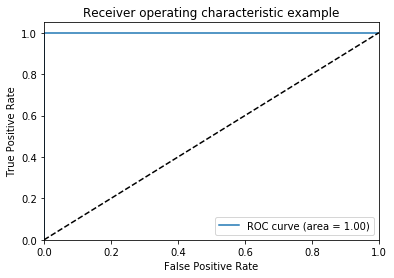

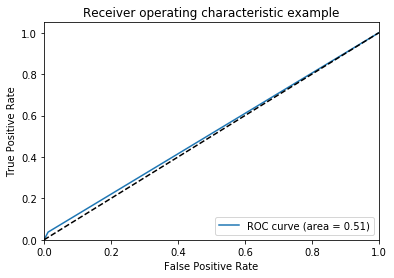

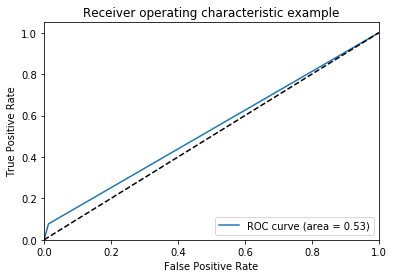

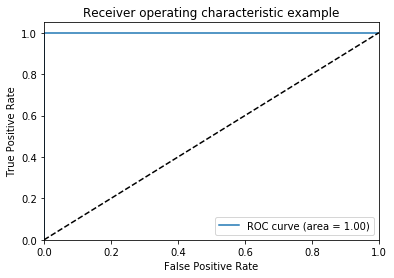

In [620]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

X= mushroom3
y = mushroom2.veilcolor   

y = label_binarize(y, classes=[0,1,2,3])
n_classes = 4

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_sm, y_sm)
predictions = tree.predict(X_test)
# Predicted class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## Random Forest Model's Fitting on data after converting to PCA

Random Forest classifier is fitted to the training data as shown in the code below. The performance of the classifier is then evaluated using the test data. The metrics I used to measure the performance of random forest model is: accuracy, precision, recall, specificity, f1 score and ROC curve.

As mentioned above, the data set has imbalanced target (too many 'w's but seldom 'n','o','y's), SMOTE (Synthetic Minority Over-sampling Technique) is an over-sampling method, it creates synthetic samples of the minority class. Therefore, I would use SMOTE to resampling the dataset wile fitting the decision tree model:

In [621]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X = mushroom3
y = mushroom2.veilcolor            

# Partition data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# Reduce dimensionality of the features from 113 to two principal components
pca = PCA(n_components=2).fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier().fit(X_sm, y_sm)
# Predicted class
print(forest.predict(X_test))

[0 0 0 ... 0 0 0]


Print the multi-label confusion matrix:

In [622]:
predictions = forest.predict(X_test)
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, predictions)

array([[[  45,    2],
        [   4, 1574]],

       [[1581,   14],
        [  30,    0]],

       [[1577,   33],
        [  13,    2]],

       [[1623,    0],
        [   2,    0]]])

Calculating recall (also called the true positive rate or the sensitivity) for each class:

In [623]:
mcm = multilabel_confusion_matrix(y_test, predictions)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
tp / (tp + fn)

array([0.99746515, 0.        , 0.13333333, 0.        ])

Calculating specificity (also called the true negative rate) for each class:

In [624]:
tn / (tn + fp)

array([0.95744681, 0.99122257, 0.97950311, 1.        ])

Calculating accuracy for each class:

In [625]:
(tp + tn) / (tn + fp + tp + fn)

array([0.99630769, 0.97292308, 0.97169231, 0.99876923])

Calculating precision for each class:

In [626]:
tp / (tp + fp)

array([0.99873096, 0.        , 0.05714286,        nan])

Calculating f1 score for each class:

In [627]:
2 / ((1/(tp / (tp + fn))) + ((1/(tp / (tp + fp)))))

array([0.99809765, 0.        , 0.08      ,        nan])

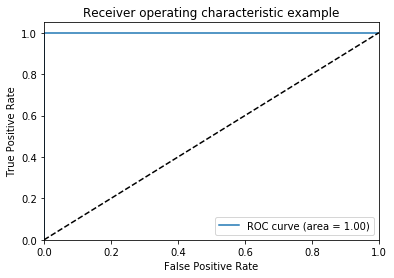

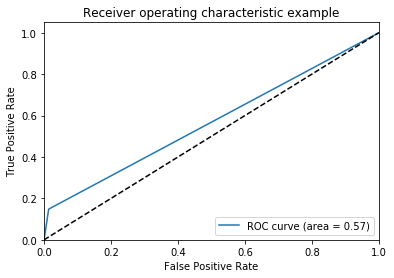

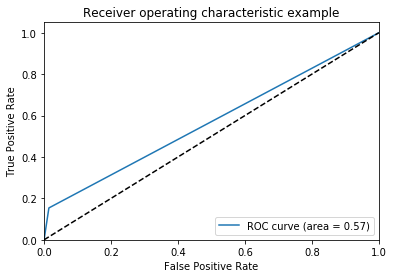

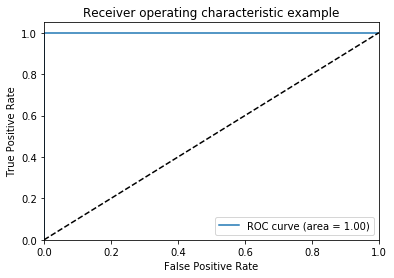

In [628]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

X= mushroom3
y = mushroom2.veilcolor   

y = label_binarize(y, classes=[0,1,2,3])
n_classes = 4

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier().fit(X_sm, y_sm)
predictions = forest.predict(X_test)
# Predicted class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Make a table to compare the metrics and ROC curve between Desicion Tree model and Random Forest model after coverting the data to PCA:

<table>
  <thead>
    <tr>
      <th>Metric score</th>
      <th>white:w Decision Tree</th>
      <th>white:w Random Forest</th>
      <th>brown:n Decision Tree</th>
      <th>brown:n Random Forest</th>
      <th>orange:o Decision Tree</th>
      <th>orange:o Random Forest</th>
      <th>yellow:y Decision Tree</th>
      <th>yellow:y Random Forest</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Accuracy</td>
      <th>0.99569231</th>
      <th>0.99876923</th>
      <th>0.97169231</th>
      <th>0.97353846</th>
      <th>0.97169231</th>
      <th>0.97353846</th>
      <th>0.99938462</th>
      <th>0.99876923</th>
    </tr>
    <tr>
      <td>Precision</td>
      <th>0.99936427</th>
      <th>0.99873418</th>
      <th>0</th>
      <th>0</th>
      <th>0.05714286</th>
      <th>0.0625</th>
      <th>1</th>
      <th>nan</th>
    </tr>
      <tr>
      <td>Recall</td>
      <th>0.99619772</th>
      <th>1</th>
      <th>0</th>
      <th>0</th>
      <th>0.13333333</th>
      <th>0.13333333</th>
      <th>0.5 </th>
      <th>0</th>
    </tr>
    <tr>
      <td>Specificity</td>
      <th>0.9787234</th>
      <th>0.95744681</th>
      <th>0.98996865</th>
      <th>0.99184953</th>
      <th>0.97950311</th>
      <th>0.98136646</th>
      <th>1</th>
      <th>1</th>
    </tr>
      <tr>
      <td>f1 score</td>
      <th>0.99777848</th>
      <th>0.99936669</th>
      <th>0</th>
      <th>0</th>
      <th>0.08</th>
      <th>0.08510638</th>
      <th>0.66666667</th>
      <th>nan</th>
      </tr>
     <tr>
      <td>ROC curve area</td>
      <th>1.0</th>
      <th>1.0</th>
      <th>0.51</th>
      <th>0.59</th>
      <th>0.53</th>
      <th>0.55</th>
      <th>1.0</th>
      <th>1.0</th>
    </tr>
  </tbody>
</table>

### Temporary conclusion:

- Random Forest model has a little higher accuracy than Decision Tree model in white(w), brown(n) and orange (o), but in predicting yellow, decision tree has a little higher accuracy than random forest.

- Random Forest model has a little higher precision than Decision Tree model in predicting orange(o), but in predicting white(w), decision tree has a little higher precision than random forest model.

- Random Forest model has a little higher recall than Decision Tree model in white(w), but in predicting yellow, decision tree has a little higher recall than random forest. In predicting orange(o), they have the same recall.

- Random Forest model has a little higher specificity than Decision Tree model in predicting brown(n) and orange(o), but in predicting white(w), decision tree has a little higher precision than random forest model. In predicting yellow(y), they have the same specificity.

- Random Forest model has a little higher ROC curve area than Decision Tree model in predicting brown(w) and orange(o). In predicting white(w) and yellow(y), they have the same ROC curve area.



Based on those scores, Random forest model is a little better than Decision Tree model after converting all the features to PCA.

In case the conclusion is not dependent on the dimension reduction method I choose, I would use another feature selection method to choose another set of independent variables again, to fit in Decision tree model and random forest model again and to measure the performance between them.

## Dimension Reduction 2: Feature selection

According to the below graph, since my input variables are categorical variables, my output variables are also categorical variables, it is better to choose Chi-Squared method and Mutual information method to do the feature selection.
(According to [this link](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/): How to choose a feature selection method for machine learning).

In [629]:
## Graph of how to choose a feature selection method
from IPython.display import Image
img = 'featureselection.png'
Image(url=img)

### 1. Chi-Squared Feature Selection

In [630]:
#Splitting the data into independent and dependent variables
X = mushroom[['PE','capshape','capsurface','capcolor','bruises','odor','gillattachment','gillspacing','gillsize',
            'gillcolor','stalkshape','stalksurfaceabovering','stalksurfacebelowring','ringnumber',
             'ringtype','sporeprintcolor','population','habitat']].values
y = mushroom['veilcolor'].values

I will use the train_test_split() function from scikit-learn and use 80% of the data for training and 20% for testing.

In [631]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [632]:
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (6499, 18) (6499,)
Test (1625, 18) (1625,)


The function below named prepare_inputs() takes the input data for the train and test sets and encodes it using an ordinal encoding.

In [633]:
from sklearn.preprocessing import OrdinalEncoder
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

I also need to prepare the target variable.

In [634]:
from sklearn.preprocessing import LabelEncoder
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

We can call these functions to prepare our data.

In [635]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

Now that I have loaded and prepared the dataset, I can explore feature selection.

The scikit-learn machine library provides an implementation of the chi-squared test in the chi2() function. I can define the SelectKBest class to use the chi2() function and select all features, then transform the train and test sets.

In [636]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

I can then print the scores for each variable (largest is better), and plot the scores for each variable as a bar graph to get an idea of how many features I should select.

Feature 0: 75.762162
Feature 1: 32.979415
Feature 2: 6.842556
Feature 3: 35.226522
Feature 4: 65.628999
Feature 5: 28.557834
Feature 6: 147.627184
Feature 7: 50.136742
Feature 8: 55.882761
Feature 9: 232.435594
Feature 10: 89.778723
Feature 11: 24.785194
Feature 12: 22.053484
Feature 13: 0.741108
Feature 14: 205.435688
Feature 15: 19.808170
Feature 16: 58.681310
Feature 17: 26.148292


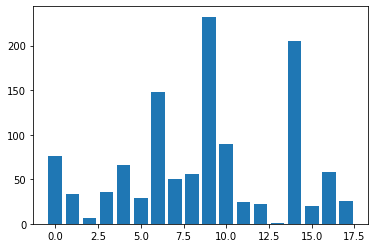

In [637]:
import matplotlib.pyplot as plt
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

The score shows that features 9, 14, 6, and 10 are most relevant to the target. The bar chart also shows the same result.

- feature 9: gill color
- feature 14: ring type
- feature 6: gill attachment
- feature 10: stalk shape

### 2. Mutual Information Feature Selection

Mutual information from the field of information theory is the application of information gain to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

The scikit-learn machine learning library provides an implementation of mutual information for feature selection via the mutual_info_classif() function.

In [638]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.023152
Feature 1: 0.005674
Feature 2: 0.034132
Feature 3: 0.036906
Feature 4: 0.011336
Feature 5: 0.022996
Feature 6: 0.112198
Feature 7: 0.009070
Feature 8: 0.016540
Feature 9: 0.077578
Feature 10: 0.023324
Feature 11: 0.015165
Feature 12: 0.016700
Feature 13: 0.010655
Feature 14: 0.017277
Feature 15: 0.089211
Feature 16: 0.038105
Feature 17: 0.063061


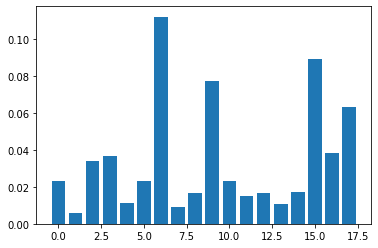

In [639]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

The score shows that features 6, 15, 9, and 17 are most relevant to the target. The bar chart also shows the same result.

- feature 6: gill attachment
- feature 15: spore print color
- feature 9: gill color
- feature 17: habitat

## Modeling With Selected Features

I will construct four models in the following sequence:

1. Decision Tree model with features selected by Chi-Square method.
2. Random Forest model with features selected by Chi-Square method.

Then comparing the performance of those two models through metrics and ROC curves.

3. Decision Tree model with features selected by mutual information method.
4. Random forest model with features selected by mutual informaton method.

Then comparing the performance of those two models through metrics and ROC curves.

Let me get started:
###  1. Decision Tree model with features selected by Chi-Square method.

In [713]:
## Decision Tree model with features selected by Chi-Square method.
X = mushroom[['gillcolor','ringtype','gillattachment','stalkshape']].values
y = mushroom['veilcolor'].values

# Partition data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train_enc,y_train_enc)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_sm, y_sm)
# Predicted class
print(tree.predict(X_test_enc))

[2 2 2 ... 2 2 2]


Print the multi-label confusion matrix:

In [714]:
predictions = tree.predict(X_test_enc)
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test_enc, predictions)

array([[[1595,    0],
        [  30,    0]],

       [[1580,   30],
        [   0,   15]],

       [[  47,    0],
        [  28, 1550]],

       [[1595,   28],
        [   0,    2]]])

Calculating recall (also called the true positive rate or the sensitivity) for each class:

In [715]:
mcm = multilabel_confusion_matrix(y_test_enc, predictions)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
tp / (tp + fn)

array([0.        , 1.        , 0.98225602, 1.        ])

Calculating specificity (also called the true negative rate) for each class:

In [716]:
tn / (tn + fp)

array([1.        , 0.98136646, 1.        , 0.982748  ])

Calculating accuracy for each class:

In [717]:
(tp + tn) / (tn + fp + tp + fn)

array([0.98153846, 0.98153846, 0.98276923, 0.98276923])

Calculating precision for each class:

In [718]:
tp / (tp + fp)

array([       nan, 0.33333333, 1.        , 0.06666667])

Calculating f1 score for each class:

In [719]:
2 / ((1/(tp / (tp + fn))) + ((1/(tp / (tp + fp)))))

array([       nan, 0.5       , 0.99104859, 0.125     ])

### Plot the ROC curve:

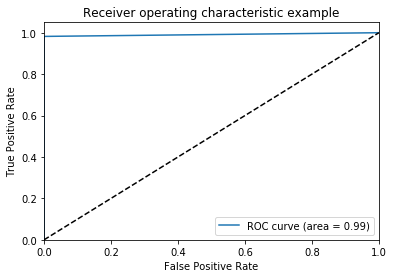

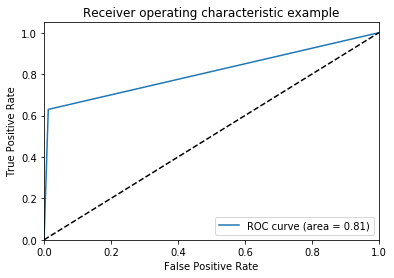

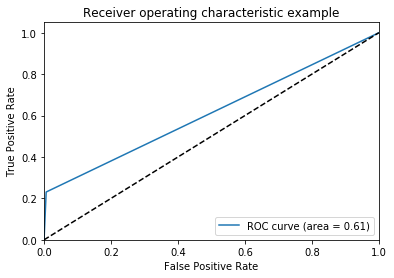

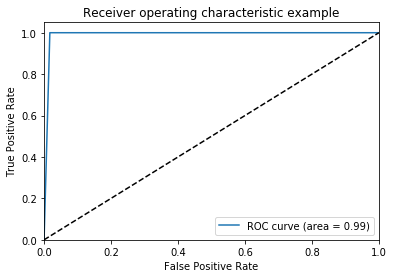

In [720]:
## The second plot
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

X = mushroom[['gillcolor','ringtype','gillattachment','stalkshape']].values
y = mushroom['veilcolor'].values    

y = label_binarize(y, classes=['w','n','o','y'])
n_classes = 4

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train_enc,y_train)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_sm, y_sm)
predictions = tree.predict(X_test_enc)
# Predicted class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

###  2. Random Forest model with features selected by Chi-Square method.

In [721]:
## Random Forest model with features selected by Chi-Square method.
X = mushroom[['gillcolor','ringtype','gillattachment','stalkshape']].values
y = mushroom['veilcolor'].values

# Partition data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train_enc,y_train_enc)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier().fit(X_sm, y_sm)
# Predicted class
print(forest.predict(X_test_enc))

[2 2 2 ... 2 2 2]


Print the multi-label confusion matrix:

In [722]:
predictions = forest.predict(X_test_enc)
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test_enc, predictions)

array([[[1595,    0],
        [  30,    0]],

       [[1580,   30],
        [   0,   15]],

       [[  47,    0],
        [  28, 1550]],

       [[1595,   28],
        [   0,    2]]])

Calculating recall (also called the true positive rate or the sensitivity) for each class:

In [723]:
mcm = multilabel_confusion_matrix(y_test_enc, predictions)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
tp / (tp + fn)

array([0.        , 1.        , 0.98225602, 1.        ])

Calculating specificity (also called the true negative rate) for each class:

In [724]:
tn / (tn + fp)

array([1.        , 0.98136646, 1.        , 0.982748  ])

Calculating accuracy for each class:

In [725]:
(tp + tn) / (tn + fp + tp + fn)

array([0.98153846, 0.98153846, 0.98276923, 0.98276923])

Calculating precision for each class:

In [726]:
tp / (tp + fp)

array([       nan, 0.33333333, 1.        , 0.06666667])

Calculating f1 score for each class:

In [727]:
2 / ((1/(tp / (tp + fn))) + ((1/(tp / (tp + fp)))))

array([       nan, 0.5       , 0.99104859, 0.125     ])

### Plot the ROC curve:

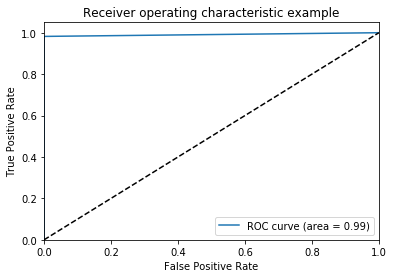

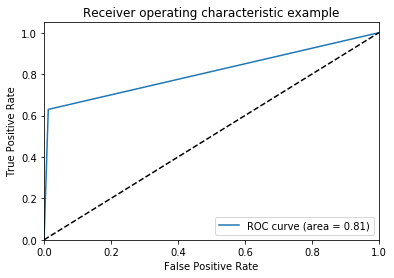

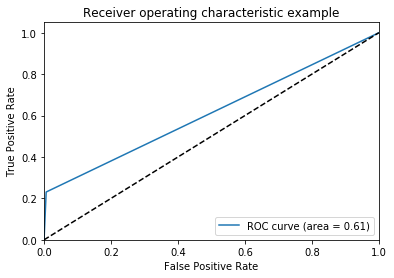

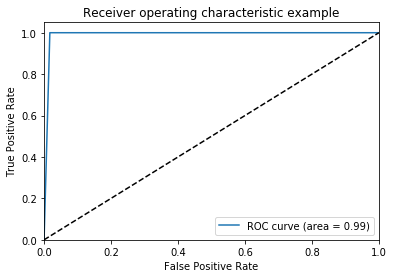

In [728]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

X = mushroom[['gillcolor','ringtype','gillattachment','stalkshape']].values
y = mushroom['veilcolor'].values    

y = label_binarize(y, classes=['w','n','o','y'])
n_classes = 4

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train_enc,y_train)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier().fit(X_sm, y_sm)
predictions = forest.predict(X_test_enc)
# Predicted class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### 3. Decision Tree model with features selected by mutual information method.

In [729]:
## Decision Tree model with features selected by mutual information method.
X = mushroom[['gillattachment','sporeprintcolor','gillcolor','habitat']].values
y = mushroom['veilcolor'].values

# Partition data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train_enc,y_train_enc)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_sm, y_sm)
# Predicted class
print(tree.predict(X_test_enc))

[2 2 2 ... 2 2 2]


Print the multi-label confusion matrix:

In [693]:
predictions = tree.predict(X_test_enc)
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test_enc, predictions)

array([[[1587,    8],
        [  26,    4]],

       [[1584,   26],
        [   8,    7]],

       [[  47,    0],
        [   6, 1572]],

       [[1617,    6],
        [   0,    2]]])

Calculating recall (also called the true positive rate or the sensitivity) for each class:

In [694]:
mcm = multilabel_confusion_matrix(y_test_enc, predictions)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
tp / (tp + fn)

array([0.13333333, 0.46666667, 0.99619772, 1.        ])

Calculating specificity (also called the true negative rate) for each class:

In [695]:
tn / (tn + fp)

array([0.99498433, 0.98385093, 1.        , 0.99630314])

Calculating accuracy for each class:

In [696]:
(tp + tn) / (tn + fp + tp + fn)

array([0.97907692, 0.97907692, 0.99630769, 0.99630769])

Calculating precision for each class:

In [697]:
tp / (tp + fp)

array([0.33333333, 0.21212121, 1.        , 0.25      ])

Calculating f1 score for each class:

In [698]:
2 / ((1/(tp / (tp + fn))) + ((1/(tp / (tp + fp)))))

array([0.19047619, 0.29166667, 0.99809524, 0.4       ])

### Plot the ROC curve:

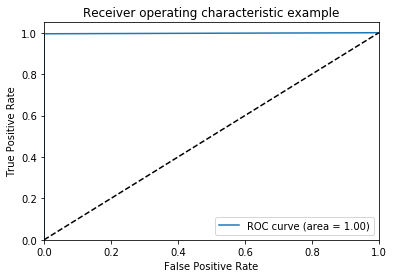

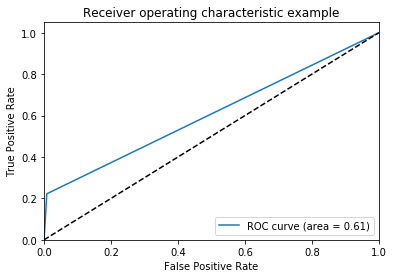

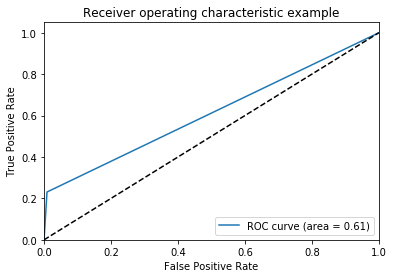

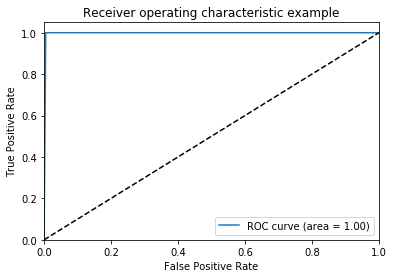

In [699]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

X = mushroom[['gillattachment','sporeprintcolor','gillcolor','habitat']].values
y = mushroom['veilcolor'].values    

y = label_binarize(y, classes=['w','n','o','y'])
n_classes = 4

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train_enc,y_train)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_sm, y_sm)
predictions = tree.predict(X_test_enc)
# Predicted class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### 4. Random Forest model with features selected by mutual information method.

In [705]:
## Random Forest model with features selected by mutual information method.
X = mushroom[['gillattachment','sporeprintcolor','gillcolor','habitat']].values
y = mushroom['veilcolor'].values

# Partition data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train_enc,y_train_enc)

from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier().fit(X_sm, y_sm)
# Predicted class
print(tree.predict(X_test_enc))

[2 2 2 ... 2 2 2]


Print the multi-label confusion matrix:

In [706]:
predictions = tree.predict(X_test_enc)
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test_enc, predictions)

array([[[1587,    8],
        [  25,    5]],

       [[1585,   25],
        [   8,    7]],

       [[  47,    0],
        [   6, 1572]],

       [[1617,    6],
        [   0,    2]]])

Calculating recall (also called the true positive rate or the sensitivity) for each class:

In [707]:
mcm = multilabel_confusion_matrix(y_test_enc, predictions)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
tp / (tp + fn)

array([0.16666667, 0.46666667, 0.99619772, 1.        ])

Calculating specificity (also called the true negative rate) for each class:

In [708]:
tn / (tn + fp)

array([0.99498433, 0.98447205, 1.        , 0.99630314])

Calculating accuracy for each class:

In [709]:
(tp + tn) / (tn + fp + tp + fn)

array([0.97969231, 0.97969231, 0.99630769, 0.99630769])

Calculating precision for each class:

In [710]:
tp / (tp + fp)

array([0.38461538, 0.21875   , 1.        , 0.25      ])

Calculating f1 score for each class:

In [711]:
2 / ((1/(tp / (tp + fn))) + ((1/(tp / (tp + fp)))))

array([0.23255814, 0.29787234, 0.99809524, 0.4       ])

### Plot the ROC curve

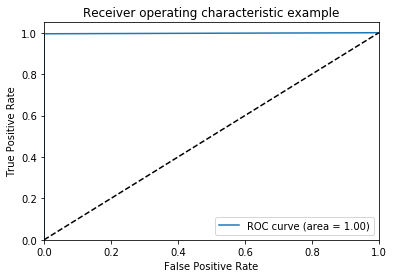

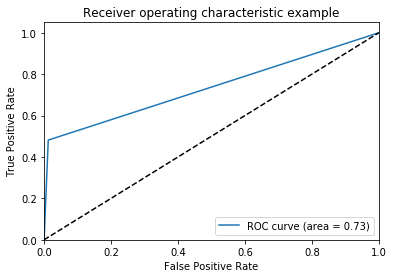

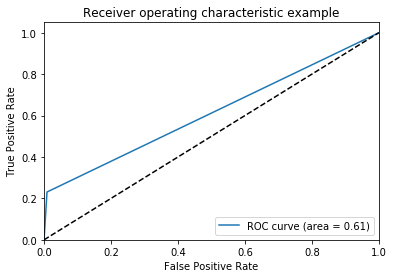

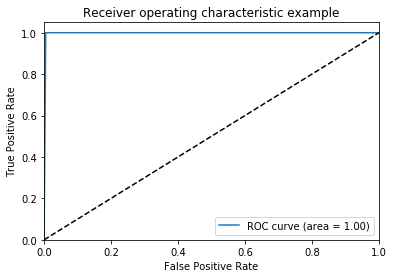

In [712]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

X = mushroom[['gillattachment','sporeprintcolor','gillcolor','habitat']].values
y = mushroom['veilcolor'].values    

y = label_binarize(y, classes=['w','n','o','y'])
n_classes = 4

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train_enc,y_train)

forest = RandomForestClassifier().fit(X_sm, y_sm)
predictions = forest.predict(X_test_enc)
# Predicted class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Make a table to compare the metrics and ROC curve between Desicion Tree model and Random Forest model using features selected by Chi-Square method and mutual information method:

#### I would construct two tables：
#### 1. The first one is comparing Decision tree model and Random Forest model with features selected by Chi-Square method
#### 2. The second one is comparing Decision tree model and Random Forest model with features selected by mutual information method.

1. Comparing Decision tree model and Random Forest model with features selected by Chi-Square method


<table>
  <thead>
    <tr>
      <th>Metric score</th>
      <th>white:w Decision Tree </th>
      <th>white:w Random Forest</th>
      <th>brown:n Decision Tree</th>
      <th>brown:n Random Forest</th>
      <th>orange:o Decision Tree</th>
      <th>orange:o Random Forest</th>
      <th>yellow:y Decision Tree</th>
      <th>yellow:y Random Forest</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Accuracy</td>
      <th>0.98153846</th>
      <th>0.98153846</th>
      <th>0.98153846</th>
      <th>0.98153846</th>
      <th>0.98276923</th>
      <th>0.98276923</th>
      <th>0.98276923</th>
      <th>0.98276923</th>
    </tr>
    <tr>
      <td>Precision</td>
      <th>nan</th>
      <th>nan</th>
      <th>0.33333333</th>
      <th>0.33333333</th>
      <th>1.0</th>
      <th>1.0</th>
      <th>0.06666667</th>
      <th>0.06666667</th>
    </tr>
      <tr>
      <td>Recall</td>
      <th>0</th>
      <th>0</th>
      <th>1.0</th>
      <th>1.0</th>
      <th>0.98225602</th>
      <th>0.98225602</th>
      <th>1.0 </th>
      <th>1.0</th>
    </tr>
    <tr>
      <td>Specificity</td>
      <th>1.0</th>
      <th>1.0</th>
      <th>0.98136646</th>
      <th>0.98136646</th>
      <th>1.0</th>
      <th>1.0</th>
      <th>0.982748</th>
      <th>0.982748</th>
    </tr>
      <tr>
      <td>f1 score</td>
      <th>nan</th>
      <th>nan</th>
      <th>0.5</th>
      <th>0.5</th>
      <th> 0.99104859</th>
      <th>0.99104859</th>
      <th>0.125</th>
      <th>0.125</th>
      </tr>
      <tr>
      <td>ROC curve area</td>
      <th>0.99</th>
      <th>0.99</th>
      <th>0.81</th>
      <th>0.91</th>
      <th>0.61</th>
      <th>0.61</th>
      <th>0.99</th>
      <th>0.99</th>
    </tr>
  </tbody>
</table>

2. Comparing Decision tree model and Random Forest model with features selected by mutual information method


<table>
  <thead>
    <tr>
      <th>Metric score</th>
      <th>white:w Decision Tree Chi</th>
      <th>white:w Random Forest</th>
      <th>brown:n Decision Tree</th>
      <th>brown:n Random Forest</th>
      <th>orange:o Decision Tree</th>
      <th>orange:o Random Forest</th>
      <th>yellow:y Decision Tree</th>
      <th>yellow:y Random Forest</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Accuracy</td>
      <th>0.97907692</th>
      <th>0.97969231</th>
      <th>0.97907692</th>
      <th>0.97969231</th>
      <th>0.99630769</th>
      <th>0.99630769</th>
      <th>0.99630769</th>
      <th>0.99630769</th>
    </tr>
    <tr>
      <td>Precision</td>
      <th>0.33333333</th>
      <th>0.38461538</th>
      <th>0.21212121</th>
      <th>0.21875</th>
      <th>1.0</th>
      <th>1.0</th>
      <th>0.25</th>
      <th>0.25</th>
    </tr>
      <tr>
      <td>Recall</td>
      <th>0.13333333</th>
      <th>0.16666667</th>
      <th>0.46666667</th>
      <th>0.46666667</th>
      <th>0.99619772</th>
      <th>0.99619772</th>
      <th>1.0 </th>
      <th>1.0</th>
    </tr>
    <tr>
      <td>Specificity</td>
      <th>0.99498433</th>
      <th>0.99498433</th>
      <th>0.98385093</th>
      <th>0.98447205</th>
      <th>1.0</th>
      <th>1.0</th>
      <th>0.99630314</th>
      <th>0.99630314</th>
    </tr>
      <tr>
      <td>f1 score</td>
      <th>0.19047619</th>
      <th>0.23255814</th>
      <th>0.29166667</th>
      <th>0.29787234</th>
      <th>0.99809524</th>
      <th>0.99809524</th>
      <th>0.4</th>
      <th>0.4</th>
      </tr>
      <tr>
      <td>ROC curve area</td>
      <th>1.0</th>
      <th>1.0</th>
      <th>0.61</th>
      <th>0.73</th>
      <th>0.61</th>
      <th>0.61</th>
      <th>1.0</th>
      <th>1.0</th>
    </tr>
  </tbody>
</table>

### Temporary conclusion:

- After selecting features using Chi-Square and Mutual information method and fit the features into Decision Tree model and Mutual information model, the results of the metrics from Decision Tree model and Random Forest Model are almost the same.

- In comparison between Decision tree model and Random Forest model with features selected by mutual information method, Random Forest model has higher accuracy, higher precision, higher recall, higher specificity, higher f1 score and higher ROC curve area.

- Therefore, Random Forest model is better than Decision Tree model in performace of the model with features selected by Mutual Information method.

#### Next I will construct a table to compare the Random Forest Tree model with the features seclected by Chi-Square method and the Random Forest Tree model with the features selected by mutual information method, to see which one is a better model:

<table>
  <thead>
    <tr>
      <th>Metric score</th>
      <th>white:w Chi-Square </th>
      <th>white:w Mutual Information</th>
      <th>brown:n Chi-Square</th>
      <th>brown:n Mutual Information</th>
      <th>orange:o Chi-Square</th>
      <th>orange:o Mutual Information</th>
      <th>yellow:y Chi-Square</th>
      <th>yellow:y Mutual Information</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Accuracy</td>
      <th>0.98153846</th>
      <th>0.97969231</th>
      <th>0.98153846</th>
      <th>0.97969231</th>
      <th>0.98276923</th>
      <th>0.99630769</th>
      <th>0.98276923</th>
      <th>0.99630769</th>
    </tr>
    <tr>
      <td>Precision</td>
      <th>nan</th>
      <th>0.38461538</th>
      <th>0.33333333</th>
      <th>0.21875</th>
      <th>1.0</th>
      <th>1.0</th>
      <th>0.06666667</th>
      <th>0.25</th>
    </tr>
      <tr>
      <td>Recall</td>
      <th>0</th>
      <th>0.16666667</th>
      <th>1.0</th>
      <th>0.46666667</th>
      <th>0.98225602</th>
      <th>0.99619772</th>
      <th>1.0 </th>
      <th>1.0</th>
    </tr>
    <tr>
      <td>Specificity</td>
      <th>1.0</th>
      <th>0.99498433</th>
      <th>0.98136646</th>
      <th>0.98447205</th>
      <th>1.0</th>
      <th>1.0</th>
      <th>0.982748</th>
      <th>0.99630314</th>
    </tr>
      <tr>
      <td>f1 score</td>
      <th>nan</th>
      <th>0.23255814</th>
      <th>0.5</th>
      <th>0.29787234</th>
      <th>0.99104859</th>
      <th>0.99809524</th>
      <th>0.125</th>
      <th>0.4</th>
      </tr>
      <tr>
      <td>ROC curve area</td>
      <th>0.99</th>
      <th>1.0</th>
      <th>0.91</th>
      <th>0.73</th>
      <th>0.61</th>
      <th>0.61</th>
      <th>0.99</th>
      <th>1.0</th>
    </tr>
  </tbody>
</table>

### Temporary conclusion:
- Mutual information method has higher accuracy than Chi-Square method in predicting orange(o) and yellow(y), while Chi-Square method has higher accuracy than Mutual information method in predicting white(w) and brown(n).

- Chi-square method has higher precision than Mutual information method in predicting brown(n) and yellow(y), while they have same precision while in predicting orange(o).

- Mutual information method has higher recall in predicting white(o) and orange(o), while Chi-Square method has higher recall in predicting brown(n), they have same recall in predicting yellow(y).

- Mutual information method has higher specificity in predicting brown(n) and yellow(y), while Chi-Square method has higher specificity in predicting white(w), they have the same specificity in predicting oriange(o).

- Mutual information method has higher f1 score in predicting orange(o) and yellow(y), while Chi-Square method has higher f1 score in predicting brown(n).

- Mutual information method has higher ROC curve area than Chi-Square method in predicting white(w) and yellow(y), while Chi-Square method has higher ROC curve area in predicting brown(n).

Chi-Square method has better prediction in veil color brown(n), overall, the features selected by Mutual Information method behaves better.

## What's the best model?

I will make a table to compare the random forest tree model after converting data to PCA with random forest tree model with features selected by Mutual Information method, to choose the 'best' model:

<table>
  <thead>
    <tr>
      <th>Metric score</th>
      <th>white:w PCA </th>
      <th>white:w Mutual Information</th>
      <th>brown:n PCA</th>
      <th>brown:n Mutual Information</th>
      <th>orange:o PCA</th>
      <th>orange:o Mutual Information</th>
      <th>yellow:y PCA</th>
      <th>yellow:y Mutual Information</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Accuracy</td>
      <th>0.99876923</th>
      <th>0.97969231</th>
      <th>0.97353846</th>
      <th>0.97969231</th>
      <th>0.97353846</th>
      <th>0.99630769</th>
      <th>0.99876923</th>
      <th>0.99630769</th>
    </tr>
    <tr>
      <td>Precision</td>
      <th>0.99873418</th>
      <th>0.38461538</th>
      <th>0</th>
      <th>0.21875</th>
      <th>0.0625</th>
      <th>1.0</th>
      <th>nan</th>
      <th>0.25</th>
    </tr>
      <tr>
      <td>Recall</td>
      <th>1</th>
      <th>0.16666667</th>
      <th>0</th>
      <th>0.46666667</th>
      <th>0.13333333</th>
      <th>0.99619772</th>
      <th>0 </th>
      <th>1.0</th>
    </tr>
    <tr>
      <td>Specificity</td>
      <th>0.95744681</th>
      <th>0.99498433</th>
      <th>0.99184953</th>
      <th>0.98447205</th>
      <th>0.98136646</th>
      <th>1.0</th>
      <th>1.0</th>
      <th>0.99630314</th>
    </tr>
      <tr>
      <td>f1 score</td>
      <th>0.99936669</th>
      <th>0.23255814</th>
      <th>0</th>
      <th>0.29787234</th>
      <th>0.08510638</th>
      <th>0.99809524</th>
      <th>nan</th>
      <th>0.4</th>
      </tr>
      <tr>
      <td>ROC curve area</td>
      <th>1.0</th>
      <th>1.0</th>
      <th>0.59</th>
      <th>0.73</th>
      <th>0.55</th>
      <th>0.61</th>
      <th>1.0</th>
      <th>1.0</th>
    </tr>
  </tbody>
</table>

### Temporary conclusion:
- Mutual information method has higher accuracy than PCA model in predicting brown(n) and orange(o), while PCA model has higher accuracy than Mutual information method in predicting white(w) and yellow(y).

- PCA model has higher precision than Mutual information method in predicting white(w), while Mutual information method has higher precision in predicting brown(n) and orange(o).

- Mutual information method has higher recall in predicting brown(n), orange(o) and yellow(y),while PCA model has higher recall in predicting white(w).

- Mutual information method has higher specificity in predicting white(w) and orange(o), while PCA model has higher specificity in predicting brown(n) and yellow(y).

- Mutual information method has higher f1 score in predicting brown(n) and orange(o), while PCA model has higher f1 score in predicting white(w).

- Mutual information method has higher ROC curve area than PCA model in predicting brown(n) and orange(o), they have same ROC Curve area in predicting white(w) and yellow(y).

PCA model has better predictions in white(w), while Mutual information method model is better in average.

## Final Conclusion

1. After EDA, I delete one column which is veil type, because it does not provide any information for the classifications. Also, I delete the column 'stalk root' because it has too many missing values.

2. From EDA, I found the target variable 'veil color' is an imbalanced data, therefore I perform SMOTE to solve this problem.

3. I choose three different method to reduce the dimension of the dataset, first is PCA, I converted the whole data into two principal components, train and test the converted data using Decision Tree model and Random Forest model, calculate the metrics and plot the ROC curve. Second is the model with features selected by Chi-Square Method, the third is the model with features selected by mutual information method.

4. Comparing with Decision Tree model after converting data to PCA and Random Forest model after converting data to PCA, I found Random Forest model has higher predictibility by comparing their metrics.

5. Comparing Decsion Tree model and Random Forest model with features selected by Chi-Square Method, there is not much difference.

6. Comparing Decsion Tree model and Random Forest model with features selected by Mutual Information Method, Random Forest Model gives a better ROC curve area.

7. Comparing with Random Forest model with features selected by Chi-Square Method and Random Forest model with features selected by mutual information method, I found the model with features selected by mutual information method has higher predictibility.

8. Comparing with Random Forest model with PCA and Random Forest model with features selected by mutual information method, I found the model with PCA has a better predictility in predicting white(o) while model with features selected by mutual information method has better score of metrics in average.

Therefore, Random Forest model with data converting to PCA is the best model in my mind. 